<a href="https://colab.research.google.com/github/dani16antonio/Artificial-Intelligence-examles/blob/master/Mnist_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN Model
## DNN over mnist dataset to classify hand-written numbers
LeNet architecture:
- Convolution kernels number: **32**, kernel size: **4x4**, activation: **relu**
- MaxPooling windows size: **2x2**, stripe: **2x2**
- Convolution kernels number: **64**, kernel size: **4x4**, activation: **relu**
- MaxPooling windows size: **2x2**, stripe: **2x2**
- Flatten
- Fully connected units number: **1024** activation: **relu**
- Fully connected units number: **10** activation: **relu**



In [1]:
# Import Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, 
                                     Input, Reshape, Flatten)

# Import helper dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

11493376/11490434 [==============================] - 0s 0us/step


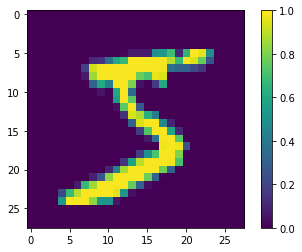

In [3]:
# Visualize data
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

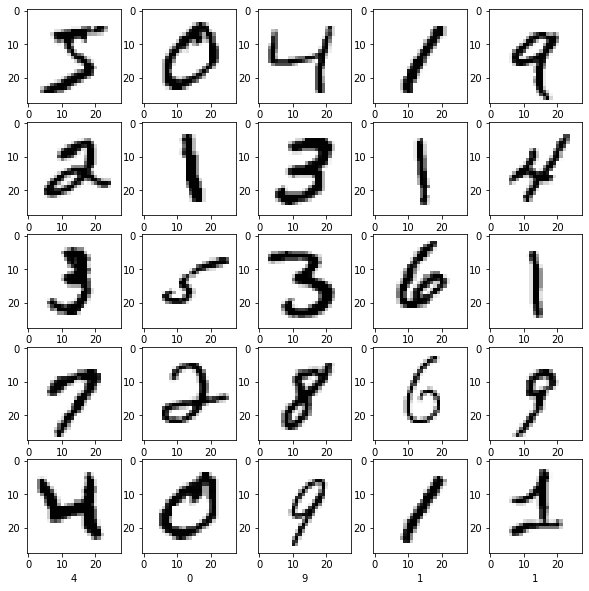

In [4]:
# Show images
X_train, X_test = X_train/255., X_test/255.
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [21]:
# Reshape images
X_train_ = np.reshape(X_train, (-1,28,28,1))
X_test_ = np.reshape(X_test, (-1,28,28,1))
print(X_test_.shape, type(X_test_)==type(X_test))

(10000, 28, 28, 1) True


In [22]:
# building the model
model = keras.Sequential(name='LeNet_1')
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, 4, activation=keras.activations.relu, name='Layer1_Conv'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', 
                    name='Layer1_Mpool'))
model.add(Conv2D(64, 4, activation=keras.activations.relu, name='Layer2_Conv'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same', 
                    name='Layer2_Mpool'))
model.add(Flatten(name='Layer3_fl'))
model.add(Dense(1024, name='Layer4_fc', activation=keras.activations.relu))
model.add(Dense(10, name='Layer5_fc'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [15]:
model.summary()

Model: "LeNet_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1_Conv (Conv2D)         (None, 25, 25, 32)        544       
_________________________________________________________________
Layer1_Mpool (MaxPooling2D)  (None, 13, 13, 32)        0         
_________________________________________________________________
Layer2_Conv (Conv2D)         (None, 10, 10, 64)        32832     
_________________________________________________________________
Layer2_Mpool (MaxPooling2D)  (None, 5, 5, 64)          0         
_________________________________________________________________
Layer3_fl (Flatten)          (None, 1600)              0         
_________________________________________________________________
Layer4_fc (Dense)            (None, 1024)              1639424   
_________________________________________________________________
Layer5_fc (Dense)            (None, 10)                1025

In [24]:
history = model.fit(X_train_, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.5479 - accuracy: 0.8146
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1269 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0637 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0528 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 85s 46m

In [25]:
# Test the model
test_loss, test_acc = model.evaluate(X_test_, y_test, verbose=2)
print("Test accuracy:{:.2f}%".format(test_acc * 100))

313/313 - 4s - loss: 0.0410 - accuracy: 0.9870
Test accuracy:98.70%


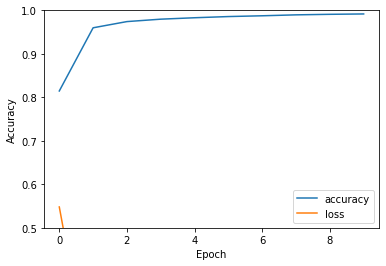

In [33]:
# Plot the accuracy and the loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')